# Optum Stratathon Season 3
Team Runtime-Terror: Members: Kshitiz Priyam, Shruti Bibra(Team Leader) & Kashish Goswami

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing & Visualisation

In [7]:
url = "https://raw.githubusercontent.com/kshitizpriyam/OptumDatabaseTeamRuntime-Terror/main/Patients%20sample%20data.csv"
df = pd.read_csv(url)

In [8]:
df

,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,271227.08,1334.88
1,793946.01,3204.49
2,574111.90,2606.40
3,935630.30,8756.19
4,598763.07,3772.20
5,8718.66,1499.08
6,397548.14,3093.12
7,26400.00,774.96
8,987310.04,14166.01
9,80155.36,1599.08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HEALTHCARE_EXPENSES  49 non-null     float64
 1   HEALTHCARE_COVERAGE  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [10]:
df.describe()

,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
count,4.900000e+01,49.000000
mean,7.217602e+05,7052.152041
std,4.648817e+05,6326.471053
min,8.718660e+03,774.960000
25%,2.970615e+05,3093.120000
50%,7.009192e+05,5330.360000
75%,1.084777e+06,9406.690000
max,1.551126e+06,36121.330000


Text(0.5, 1.0, 'Expenses vs Coverage')

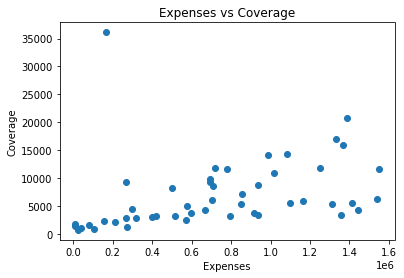

In [11]:
plt.scatter(x=df.HEALTHCARE_EXPENSES,y=df.HEALTHCARE_COVERAGE)
plt.xlabel("Expenses")
plt.ylabel("Coverage")
plt.title("Expenses vs Coverage")

In [16]:
#Data Cleaning

In [13]:
df.isnull()

,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


df.isnull().sum()

In [19]:
df.head(5)

,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,271227.08,1334.88
1,793946.01,3204.49
2,574111.90,2606.40
3,935630.30,8756.19
4,598763.07,3772.20


## Data Splitting

In [20]:
X = df.drop("HEALTHCARE_EXPENSES",axis="columns")
Y = df.drop("HEALTHCARE_COVERAGE", axis="columns")

In [21]:
print(X.shape)
print(Y.shape)

(49, 1)
(49, 1)


## Training Data, Linear Regression

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=51)

In [25]:
X_train.shape

(39, 1)

In [26]:
X_test.shape

(10, 1)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [28]:
lr.fit(X_train,Y_train)

LinearRegression()

In [29]:
lr.coef_

array([[21.85324761]])

In [30]:
lr.intercept_

array([510625.46159341])

In [32]:
lr.predict([[21.25]])[0][0].round(2)

511089.84

In [33]:
Y_pred = lr.predict(X_test)
Y_pred

array([[593060.28221978],
       [558609.07443094],
       [593441.40285806],
       [763761.2440642 ],
       [539796.92476019],
       [631807.83848832],
       [605752.64843042],
       [768738.75827184],
       [669382.74949023],
       [567583.76615853]])

In [35]:
pd.DataFrame(np.c_[X_test,Y_test,Y_pred],columns = ["HEALTHCARE_EXPENSES","HEALTHCARE_COVERAGE","Non-Adhering Patients"])

,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,Non-Adhering Patients
0,3772.20,598763.07,593060.282220
1,2195.72,214368.94,558609.074431
2,3789.64,917509.87,593441.402858
3,11583.44,1551125.51,763761.244064
4,1334.88,271227.08,539796.924760
5,5545.28,1412795.84,631807.838488
6,4353.00,1444325.28,605752.648430
7,11811.21,1248206.86,768738.758272
8,7264.70,853594.52,669382.749490
9,2606.40,574111.90,567583.766159
